In [3]:
!pip install plotly
# Required Packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns
import plotly.plotly as py
from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score
#For LR
import statsmodels.api as sm
#For LR That looks like R
import statsmodels.formula.api as smf
from statsmodels.graphics.mosaicplot import mosaic
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
print("Packages LOADED")


Packages LOADED


In [4]:
import os
print(os.getcwd())

C:\Users\HP


In [5]:
os.chdir('E:\data science\AI\Datasets')
print(os.getcwd())

E:\data science\AI\Datasets


In [6]:
data = pd.read_csv('diabetes2.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
!pip install pydot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
#import xgboost as xgb
import pydot
from IPython.display import Image
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.externals.six import StringIO
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont
pd.set_option('display.notebook_repr_html', False)
get_ipython().magic('matplotlib inline')
plt.style.use('seaborn-white')
from sklearn import svm
print("Package Loaded")

Package Loaded


In [9]:
array = data.values
array


array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [10]:
type(array)

numpy.ndarray

In [11]:
X = array[:,0:8] # ivs for train
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [12]:
y = array[:,8] # dv
y

array([1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
       1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0.,
       0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 0., 0., 0., 0.

In [13]:
test_size = 0.33
from sklearn.model_selection import train_test_split
                    #pip install -U scikit-learn

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=test_size)
print('Partitioning Done!')

Partitioning Done!


In [15]:
print(y[:10])

[1. 0. 1. 0. 1. 0. 1. 0. 1. 1.]


In [14]:
model = svm.SVC(kernel='linear')
model.fit(X_train,y_train)
model.score(X_test,y_test)


0.7598425196850394

In [15]:
pred= model.predict(X_test)
pred

array([1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0.,
       1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0.,
       1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
       1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0.,
       1., 0., 1., 0., 0.

In [16]:
cm_df = pd.DataFrame(confusion_matrix(y_test, pred).T, index=model.classes_,
columns=model.classes_)
cm_df.index.name = 'Predicted'
cm_df.columns.name = 'True'
print(cm_df)

True       0.0  1.0
Predicted          
0.0        139   38
1.0         23   54


In [17]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         0.0       0.79      0.86      0.82       162
         1.0       0.70      0.59      0.64        92

   micro avg       0.76      0.76      0.76       254
   macro avg       0.74      0.72      0.73       254
weighted avg       0.75      0.76      0.75       254



ROC AUC: 0.72


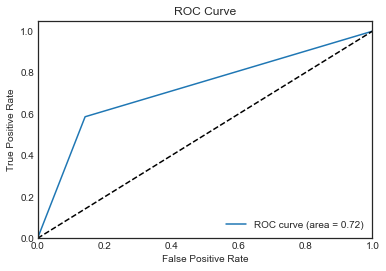

In [18]:
from sklearn.metrics import roc_curve,auc

fpr, tpr, _ = roc_curve(y_test, pred)
# Calculate the AUC
roc_auc = auc(fpr, tpr)
print('ROC AUC: %0.2f' % roc_auc)
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [24]:
import sklearn
train, test = sklearn.model_selection.train_test_split(data, train_size = 0.7)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning:

From version 0.21, test_size will always complement train_size unless both are specified.



In [25]:
print("For Main Data Set :",data["Outcome"].count())

For Main Data Set : 768


In [26]:
print("For Train Set :",train["Outcome"].count())
print("For Test Set :",test["Outcome"].count())

For Train Set : 537
For Test Set : 231


In [27]:
x_train=train[['Glucose','Age','DiabetesPedigreeFunction','BMI','Insulin','SkinThickness','BloodPressure','Pregnancies']]
x_test=test[['Glucose','Age','DiabetesPedigreeFunction','BMI','Insulin','SkinThickness','BloodPressure','Pregnancies']]
y_train=train["Outcome"]
y_test=test["Outcome"]

In [28]:
from sklearn import svm
model = svm.SVC(kernel='linear')
model.fit(x_train,y_train)
pred=model.predict(x_test)
cm_df = pd.DataFrame(confusion_matrix(y_test, pred).T, index=model.classes_,
columns=model.classes_)
cm_df.index.name = 'Predicted'
cm_df.columns.name = 'True'
print(cm_df)

True         0   1
Predicted         
0          127  36
1           20  48


In [29]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82       147
           1       0.71      0.57      0.63        84

   micro avg       0.76      0.76      0.76       231
   macro avg       0.74      0.72      0.73       231
weighted avg       0.75      0.76      0.75       231



In [30]:
fpr, tpr, _ = roc_curve(y_test, pred)

In [31]:
# Calculate the AUC
roc_auc = auc(fpr, tpr)
print('ROC AUC: %0.2f' % roc_auc)

ROC AUC: 0.72


In [32]:
# Plot of a ROC curve for a specific class
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

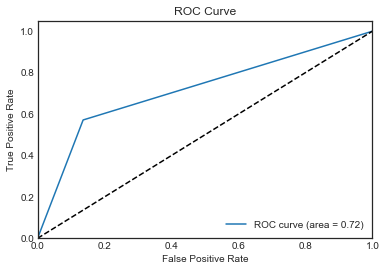

In [33]:
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [34]:
import sklearn
train, test = sklearn.model_selection.train_test_split(data, train_size = 0.7)
print("For Main Data Set :",data["Outcome"].count())
print("For Train Set :",train["Outcome"].count())
print("For Test Set :",test["Outcome"].count())
x_train=train[['Glucose','Age','DiabetesPedigreeFunction','BMI','Insulin','SkinThickness','BloodPressure','Pregnancies']]
x_test=test[['Glucose','Age','DiabetesPedigreeFunction','BMI','Insulin','SkinThickness','BloodPressure','Pregnancies']]
y_train=train["Outcome"]
y_test=test["Outcome"]

For Main Data Set : 768
For Train Set : 537
For Test Set : 231


C:\Users\HP\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning:

From version 0.21, test_size will always complement train_size unless both are specified.



In [35]:
#*** SVM
from sklearn import svm
model = svm.SVC(kernel='linear')
model.fit(x_train,y_train)
pred=model.predict(x_test)
cm_df = pd.DataFrame(confusion_matrix(y_test, pred).T, index=model.classes_,
columns=model.classes_)
cm_df.index.name = 'Predicted'
cm_df.columns.name = 'True'
print(cm_df)

True         0   1
Predicted         
0          133  43
1           14  41


In [36]:
print(classification_report(y_test, pred))
model.score(x_test,y_test)

              precision    recall  f1-score   support

           0       0.76      0.90      0.82       147
           1       0.75      0.49      0.59        84

   micro avg       0.75      0.75      0.75       231
   macro avg       0.75      0.70      0.71       231
weighted avg       0.75      0.75      0.74       231



0.7532467532467533

In [37]:
fpr, tpr, _ = roc_curve(y_test, pred)
# Calculate the AUC
roc_auc = auc(fpr, tpr)
print('ROC AUC: %0.3f' % roc_auc)
# Plot of a ROC curve for a specific class
plt.figure()

ROC AUC: 0.696


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

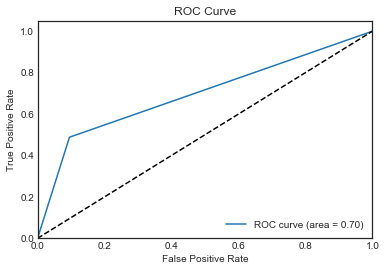

In [38]:
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()